<a href="https://colab.research.google.com/github/jdeweese1/ENGL_415_Final_Report/blob/master/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
%pip install jupyter_contrib_nbextensions

     |████████████████████████████████| 20.9MB 1.2MB/s 
     |████████████████████████████████| 481kB 52.1MB/s 
     |████████████████████████████████| 870kB 37.7MB/s 
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465825 sha256=d829e778b48f8a8845cd5f7606b9f951a95292500861f0f394a459b08026b192
  Stored in directory: /root/.cache/pip/wheels/15/df/fe/2a74fe34709e7fdc5ae153a768675d9fda93cc7d5133ed1fb0
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963395 sha256=a2d51bb791367e206e335086fe0b6f20fb62480685dedd03738bfa6ec7415df5
  Stored in directory: /root/.cache/pip/wheels/0d/71/2a/164491997299b9f2479a251e254323fe35d946779e18f27956
Successfully built jupyter-nbextensions-configurator jupyter-latex-envs


# Practical overview of Data Analysis and Visualization technology in Python: An Overview
#### Jarod J. DeWeese, Kansas State University





## Abstract
  ### Definitions
  - Data Science - The process of gathering, extracting and analyzing, and communicating data to gain intelligience for your organization. Definition inspired by [Berkley's page on data science](https://datascience.berkeley.edu/about/what-is-data-science/)
  - Data Visualization - Practice of taking data and presenting graphs, tables, charts, or animations in an accurate,straightforward fashion.
  - Machine Learning (ML) - Field of Computer Science concerned with studying algorithms to be able to use experience or datasets to improve performance in future tasks or predict outcomes. Definition inspired by [Microsoft Azure documentation](https://docs.microsoft.com/en-us/azure/machine-learning/concept-deep-learning-vs-machine-learning#deep-learning-machine-learning-and-ai)
  - Python - General purpose programming language used for scripting, software engineering, Data Science, Data Visualization, and scientific computing.
  - Package/Module/Library - For the purposes of this paper, the three of these terms are interchangable. These are pieces of software written in Python that provide some kind of speciallized functionality, often open sourced and provided by a third party for other programmers to include in their own software.

--- 

## Introduction
This report by no means is meant to be a comprehensive guide to every technique, language and framework that can be used to analyze data. Rather, this report aims to be a "survey" that increases the reader's exposure to such concepts and offers resources for learning more about the concepts covered here.

This report is designed with the idea that the reader is performing research, likely in academia dealing with large datasets and is an intermediate programmer seeking to understand how to leverage data science in their research and reporting endeavors.

Due to both the prevalance and performance of modern computing power, storage capabilities, and data collection processes, researchers are dealing with more data than before in history. As a direct result of this tech boom, many researchers must learn how to leverage new technologies to process their findings. This report aims to provide a high level overview of concepts and practical applications of this technology.

In this report I will talk about how this format lends itself to teaching about the subject matter, why data needs to be visualized, perform a case study of two data visualizations, provide examples of cutting edge Python data tools, code examples to use said tools, as well as provide additional resources to explore the field.





---

## Body
For the purposes of this report I will the language I will primarily cover is the Python programming language, as it is currently the leading language academics and industry professionals use for data science work. In addition to it's prevalance in the real world, the Python tools and frameworks can be run interactively inside this Jupyter notebook allowing from greater depth of exploration of such tools. 

### About the format of this report
As you've no doubt noticed, this report is in a bit of an untraditional format. Rather than opt for a static document such as a Microsoft Word or Google doc, I chose a [Jupyter](https://jupyter.org/) notebook.

Because Jupyter notebooks are such an integral part of how many information professionals wrangle data, having an understanding of how to best use this format will put you well on your way to developing an understanding of your data. A few features of the notebook that will prove useful are as follows: ability to run real code inside of the notebook, easily obtaining user input inside a notebook, ability to install third party packages to extend functionality, and use the simple, human readable syntax of [Markdown](https://daringfireball.net/projects/markdown/) to format your notebook. 

If you are not reading this report in Google Colab, I reccommend switching to it now, as many of the features I'm leveraging work best in that environment. This includes the Table of Contents. I have not embedded the Table of Contents within this report, however by clicking the three lines below the title of this notebook in Colab, it will show an auto generated Table of Contents. Additionally, due to the nature of this report I could not find an easy way to number each visual. However Colab automatically gives each code block it's own number. As discussed early, my sources are not in IEEE due to the lack of tools to do so in a Jupyter notebook. To cite my sources, each source I've used is denoted by a hyperlink to the source I used.

Because this such a widespread format, there are integrations with many different services supporting the notebooks. For instance, I'm writing this report using Google Colab and I can then easily save into my GitHub repository. If there's a tool you'd like to use, but can't find one, you can develop your own solution and share it with the world!

Below see an example of an investment calculator highlighting some of the features mentioned above. With this simple markdown form, enter the principal of your investment, investment life span, and yearly interest rate. This code snippet will then tell you the value of the investment when it matures.

In [2]:
#@markdown Enter data the below fields then hit the play button on the code box.

investment_principal_dollars =   100#@param {type: "number"}
investment_timespan_years =  30#@param {type: "number"}
yearly_interest_rate = .08 #@param {type: "number", min:"0", max:".9"}
from math import e
from typing import Union


def do_interest(p:Union[int, float], r:float, years:int) -> float:
    assert 0 <= r <= 1
    
    return p * (e)**(r*years) # p*e^(rt)



final_money = do_interest(p=investment_principal_dollars, r=yearly_interest_rate, years=investment_timespan_years)

print(f'After investing ${investment_principal_dollars} at {yearly_interest_rate*100}% for {investment_timespan_years} years you will have ${final_money}')


After investing $100 at 8.0% for 30 years you will have $1102.3176380641598



### Data Visualization

#### Why visualize data?
As researcher or scientist, most of the data we collect and analyze will be in tabular form. While this is great and makes it much easier to crunch the numbers, raw data is hard for non-technical people to understand. Executives, grant committes, and funding agencies likely don't care about the intricacies of your research, they want to know that their resources are being well spent. When these stakeholders see your report, the likely will not all of the text, but are much more likely to stop and look at the visualizations you've provided.

Here are a few takeaways that apply to the majority of data visualization techniques:
- Graphs and charts should explain themselves, the reader should not have to read the surrounding text to understand the data being presented. - [NCBI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4008059/)
- In addition to the absolute numbers, including what ratio of the whole if possible serves to contextualize the data being presented. For example during the fall semester of 2019, [K-State had a student enrollment of 21,719](https://www.k-state.edu/registrar/statistics/enrbyyr.html), however that absolute number on its own doesn't mean very much as we can't contextualize it. However if we know that enrollment was 22,221 the year before we can calculate that enrollment is down by 500 students, or 2.3%. Other ways to contextualize data include examining growth or acceleration rates, change from mean and standard deviation. By using these techniques, your figures will be descriptive, as well as more useful in proving impacts to your stakeholders. 
- Figures make the most sense when they have proper labels. This includes labeling the legend, axises including units, as well as making sure the figure has a descriptive title.

#### Case Studies - COVID-19 graphs
I will critique two data visualizations that have been developed to track the spread of COVID-19 around the globe: [COVID-19 Pink](https://covid19.pink/world)(Pink)
![If you're running this in GitHub, try opening in Colab instead to see the image](https://drive.google.com/uc?id=1nnBXBN6ZTkZq2BB4AJI8jGpSmTmNAyBX) and [Aatishb's Covid Trends Site](https://aatishb.com/covidtrends/)(Trends) ![If you're running this in GitHub, try opening in Colab instead to see the image](https://drive.google.com/uc?id=1Z9aQmGqR2EPFWce3Gas08fafpOn_ccb8).

Both of these graphs provide time analysis depictions of the number of COVID-19. However the the Pink site is better at immediately conveying information of which areas of the world have the most cases, as well as the total number of cases via heat map. However, after looking at the trends dashboard for a moment you realize it carries more information than the other. This graph shows number of cases, as well as **case trajectory**, which is the more important metric to follow when assessing the severity of a virus that can spread exponentially. Note that for exponentially growing functions, using a logarithmic scale allows for seeing more insightful changes in growth.

For both of these sites, they offer a slider that allows you to visualize the spread **through time**, or for any slice of time for which they have data for. For the Pink site, this control can be found across the app, allowing for a greater degree of analysis.

The Pink site provides a variety of useful tools for tracking the spread of COVID-19 including a heatmap of each country, as well as providing the number of confirmed cases, deaths, and fatality rate, conveniently on one graph. By leveraging visualization libraries in JavaScript, they were able to make the site mor dynamic by adding hover and help text to help the better interpret the data they are looking at.

The Pink site also provides a case trajectory page, however it conveys much less information than the Trends site. This is mainly due to the way they set up the axises:
1. The Trends site y axis measures *new* cases, whereas Pink's measures total number of cases. As you can see, there a a number of sudden drops in the graph which include Taiwan, China, Hong Kong and South Korea. These sudden plummets indicates that the number of new cases (in the past week) has decreased.
2. The x axis of the Trends graph shows *total* cases, which in this case also serves as a proxy variable for time, as the number of total cases cannot decrease. This provides more data then using dates as an x axis, as when a on the graph stops traveling to the right, they have effectively slowed or stopped the spread. 


### Core Python tools for Analysis/Visualization
These are a few of the industry leading Python packages used for data science and visualization. Not only do these packages provide robust well tested analysis APIs, but many of these packages are more performant than similar code written in pure Python as they leverage the runtime efficiency of the C language internally. This combination of speed, memory efficiency and straightforward API make them great candidates for data science tools.

- [Matplotlib](https://matplotlib.org/) module is written in Python and design to create graphs, animations and other visualizations.
- [Seaborn](https://seaborn.pydata.org/) is another plotting library that can be used in conjunction with matplotlib to make charts more visually appealing. There are settings where Seaborn will produce better visuals than matplotlib, but lacks some features that matplotlib offers.
- [Pandas](https://pandas.pydata.org/) library describes itself as "a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.". Pandas speciallizes in reading, modeling and manipulating data quickly and efficently.
- [Numpy](https://numpy.org/) (Numerical Python) speciallizes in doing complex array and linear algebra operations.
- [Plotly](https://github.com/plotly/dash) is a Python package that allows for creating web apps to visualize data, **with no JavaScript knowledge required.** The Covid Trends site I evaluated above was made using this package.



#### Matplotlib exercise
Below, see a simple example of matplotlib to visualize the time value of money (TVM). TVM represents the potential of money to grow over time, and that **the sooner money is invested** the greater it's earning capacity is. In this example, our investment matures in 20 years, represented by the x axis and the y axis represents the future of that dollar. When using a rate of .12 we see the TVM of `$1.00` invested now is `$12.42`, the TVM of `$1.00` invested in 12 years instead, that dollar's earning capacity is only worth 1/3 of the dollar we put in now.

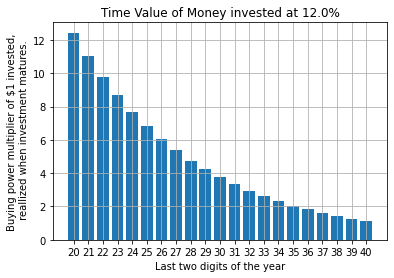

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from datetime import datetime
from collections import OrderedDict

yearly_interest_rate = .12 #@param {type: "number", min:"0", max:".9"}
cur_year = datetime.now().year
investment_period = 21
maturity_year = cur_year + investment_period
data = OrderedDict()

for i in range(investment_period):
    year_num = cur_year + i
    years_left_to_appreciate = maturity_year - year_num
    data[year_num] = do_interest(p=1,r=yearly_interest_rate, years=years_left_to_appreciate)

x = np.arange(investment_period)
labels = [str(k)[-2:] for k in data.keys()]
vals = [v for v in data.values()]

plt.bar(x, height=vals)
plt.title(f"Time Value of Money invested at {yearly_interest_rate*100}%")
plt.xticks(x,labels=labels)
plt.xlabel('Last two digits of the year')
plt.ylabel('Buying power multiplier of $1 invested,\n reallized when investment matures.')
plt.grid(b=True)
plt.show()

#### Pandas Exercise
Inside the Google Colab environment, we have access to a few sample data sets. For this exercise we will be using California housing information pulled from the 1990 Census. Below, see an example where we find
- Mean, standard deviation for number people in the surrounding block.
- Mean, and standard deviation for number of households within a block.



In [4]:
import pandas as pd
housing_data = pd.read_csv('sample_data/california_housing_train.csv')
ppl_win_one_block = housing_data['population']
households_win_one_block = housing_data['households']

ppl_win_one_block_below_mean = sum(ppl_win_one_block< ppl_win_one_block.mean())
print(f'Mean number of people within one block: {ppl_win_one_block.mean():.2f} stdev: {households_win_one_block.std()}')
print(f'Ratio of elements below mean {ppl_win_one_block_below_mean/ppl_win_one_block.count()}\n')



print(f'Mean number of households within one block: {households_win_one_block.mean():.2f}, stdev: {ppl_win_one_block.std()}\n')

households_num_below_mean = sum(households_win_one_block < households_win_one_block.mean())
print(f'Ratio of elements below mean {households_num_below_mean/households_win_one_block.count()}')

ppl_per_household = sum(ppl_win_one_block)/sum(households_win_one_block)
print(f'We guess that there are about {ppl_per_household} per household')
print(housing_data.describe())



Mean number of people within one block: 1429.57 stdev: 384.52084085590013
Ratio of elements below mean 0.6389411764705882

Mean number of households within one block: 501.22, stdev: 1147.852959159525

Ratio of elements below mean 0.6414117647058823
We guess that there are about 2.8521774961027595 per household
          longitude      latitude  ...  median_income  median_house_value
count  17000.000000  17000.000000  ...   17000.000000        17000.000000
mean    -119.562108     35.625225  ...       3.883578       207300.912353
std        2.005166      2.137340  ...       1.908157       115983.764387
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.790000     33.930000  ...       2.566375       119400.000000
50%     -118.490000     34.250000  ...       3.544600       180400.000000
75%     -118.000000     37.720000  ...       4.767000       265000.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]


Additionally, we can query our data frame on multiple attributes of our datasets in a single line, selecting items in our data that fit the specific criteria. Below see that there were 17 entries for which the following composite condition holds: `(median population in the block was less than 25 OR the number of households were less than 10) AND ALSO median income was greater than $40,000`

In [26]:
matches =housing_data.query('(population < 25 or households < 10) and median_income >= 4')
print(matches)

       longitude  latitude  ...  median_income  median_house_value
1820     -117.27     34.17  ...         4.6250            250000.0
2469     -117.61     34.02  ...         7.7197            275000.0
4382     -118.02     33.80  ...         5.8750            193800.0
5565     -118.17     33.89  ...         7.2423            350000.0
5955     -118.21     34.02  ...         7.5752             67500.0
8170     -118.43     33.97  ...         7.7197            500001.0
9425     -119.23     34.25  ...         8.0000            275000.0
9670     -119.54     36.51  ...         4.6250            162500.0
9678     -119.55     36.51  ...         4.1250             67500.0
13531    -121.96     37.13  ...        15.0001            400000.0
14120    -122.06     36.96  ...         4.5000            258300.0
14501    -122.14     37.50  ...        15.0001            500001.0
15656    -122.37     37.60  ...         5.0480            350000.0
15694    -122.39     38.00  ...         4.1250            2125

As you can see, pandas provides an API for common statistics functions on DataFrames. This allows us to easily find the mean and standard deviations of our datasets. By observing that  the standard deviation of the households DataFrame is nearly twice that of the mean, we have a notion that our data does not follow the normal distribution. In addition, pandas provides a simple API for describing the date. For instanc you can see that the median of the median incomes was `$35,446`, and the third quartile was `$47,670`.

Below see an example graphing population with number of households within one block. 


Text(0.5, 1.0, 'Matplatlib plot of\nPopulation vs households')

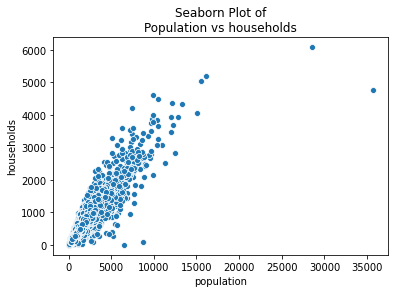

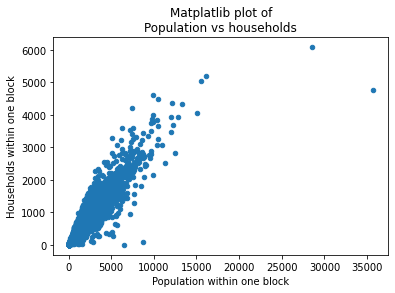

In [10]:
import seaborn as sns
sb_plot = sns.scatterplot(x=housing_data['population'], y=housing_data['households'])
sb_plot.set_title('Seaborn Plot of\nPopulation vs households')

plt = housing_data.plot(x='population', y='households', kind='scatter' )
plt.set_xlabel('Population within one block')
plt.set_ylabel('Households within one block')
plt.set_title('Pandas (using matplotlib) plot of\nPopulation vs households')

The above figure is a representation of Population vs Households within one block. The second chart is written completely with pandas, and doesn't require you to explicitly import a graphing library, as pandas uses matplotlib under the hood. However, in this case the plot with Seaborn is more visually appealing, but of course requires another package to be imported.

If we wish to be a little more fancy, we can explicitly use a plotting library as seen below. Because our dataset includes geolocation data, and after finding the appropriate scale factor, our visualization unsuprisingly looks like the state of California. In plotting this data we have encoded a lot of information:
- Latitude and Longitude, which serve as a proxy for relative population density in California.
- Median income, which is denoted by the size of each circle.
- Median house, denoted by coloring of the circles. A lighter colored circle indicates a more valuable housing area.



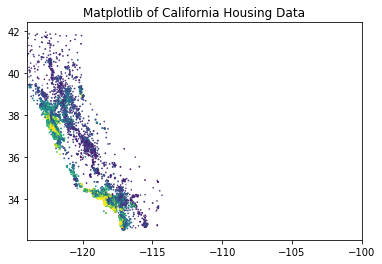

(-124.0, -100.0)

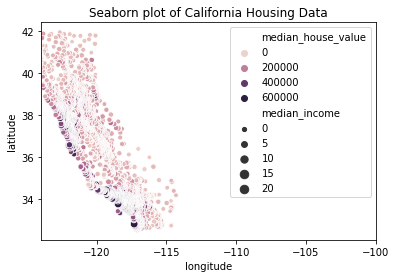

In [21]:
# Lets combine Pandas and matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
color_scale_factor = housing_data.last_valid_index()/(256**3)
house_values_colored = housing_data.median_house_value/color_scale_factor
axes = plt.gca()
axes.set_xlim([-124,-100])

plt.scatter(x=housing_data.longitude, y=housing_data.latitude, c=house_values_colored,s=housing_data.median_income/5)
plt.title('Matplotlib of California Housing Data')
plt.show()

#Plot with Seaborn
sb_plot = sns.scatterplot(x=housing_data.longitude, y=housing_data.latitude, hue=housing_data.median_house_value,size=housing_data.median_income)
sb_plot.set_title('Seaborn plot of California Housing Data')
sb_plot.axes.set_xlim([-124,-100])


Again, Seaborn produces a more appealing plot however I would argue that the one produced with pandas and matplotlib is shows more information.

#### Numpy exercises

In [25]:
import numpy as np

a = np.matrix([[1,2,3],[2,3,4],[5,6,7]])
b = np.identity(3)
ans = a@b
print(f'Sanity test: check that \n{a}\n times identity is itself, actual result is \n{ans}')

coeff_mat = np.array([[2, -5, 3],
                     [0, -2, 4],
                     [-4, 3, -1],])
const_mat = np.array([-21,-10, 7])

print(f'Next lets solve a simple system of linear equations coeff_mat:\n {coeff_mat},\n const_matrix: {const_mat}')

ans = np.linalg.solve(coeff_mat, const_mat)
print(f'After solving we get x,y,z={tuple(ans)}')
print('We can check our answer by evaluating our system with our equations')
np.allclose(np.dot(coeff_mat, ans), const_mat)


Sanity test: check that 
[[1 2 3]
 [2 3 4]
 [5 6 7]]
 times identity is itself, actual result is 
[[1. 2. 3.]
 [2. 3. 4.]
 [5. 6. 7.]]
Next lets solve a simple system of linear equations coeff_mat:
 [[ 2 -5  3]
 [ 0 -2  4]
 [-4  3 -1]],
 const_matrix: [-21 -10   7]
After solving we get x,y,z=(2.0, 5.0, 0.0)
We can check our answer by evaluating our system with our equations


True

### Additional tools for Machine Learning in Python
- [SciPy](https://www.scipy.org/) (Scientific Python) Is another package that uses many of the other packages I discussed up above. This is a very powerful tool and I do not have the time to go into all the applications of it. However a few highlights include:
    - Linear Equation solver
    - Integration
    - Vector math
    - Differential Equations solver
    - Cryptography

- [scikit-learn](https://scikit-learn.org/stable/index.html) is the Python module that is designed for machine learning using supervised learning,unsupervised learning, and other tools that can aid in predictive analysis.

Both of these packages are extremely powerful, but require a high level of technical knowledge to use correctly and accurately, thus I will not go into great details of their applications. However, both of these projects provide extensive documentation to using their APIs.



### Additional Resources

- [Talk Python To Me](https://talkpython.fm/) podcast interviews experts using Python in every corner of the industry, and provides many helpful resources and information for anyone who wants to boost their Python skills.
- K-State libraries offers many resources on visualization, including a [web page](https://guides.lib.k-state.edu/datavis) which serves as a brief guide to data visualization. Additionally, with a K-State account a [quick search for data visualization](https://k-state-primo.hosted.exlibrisgroup.com/primo-explore/search?institution=01KSU&vid=NewUI&tab=default_tab&search_scope=Entire_Library_Collection&mode=Basic&displayMode=full&bulkSize=10&highlight=true&dum=true&query=any,contains,data%20visualization&displayField=all&vl(freeText0)=data%20visualization) yields a whole host of materials.
- Additionally, if your organization has a license with [O'Reilly books](https://www.oreilly.com/)(which K-State does), and a [quick search](https://learning.oreilly.com/search/?query=Data%20Visualization) yields many technical books about data visualization.